BIG MART SALES PREDICTION (TRAIN DATA->DATA PREPARATION)


In [462]:
#by Thasleem Arifa M(KRCE)-Train data 
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRFRegressor
import joblib

Import the dataset

In [463]:
BIGMARTtraindata=pd.read_csv("E:/Train.csv")
BIGMARTtraindata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [464]:
BIGMARTtraindata.shape

(8523, 12)

In [465]:
BIGMARTtraindata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [466]:
BIGMARTtraindata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Data Cleaning and Exploration for each attribute

In [467]:
BIGMARTtraindata.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [468]:
BIGMARTtraindata.duplicated().any()

False

Item Weight

Handling the Missing Values using Univariate Imputation

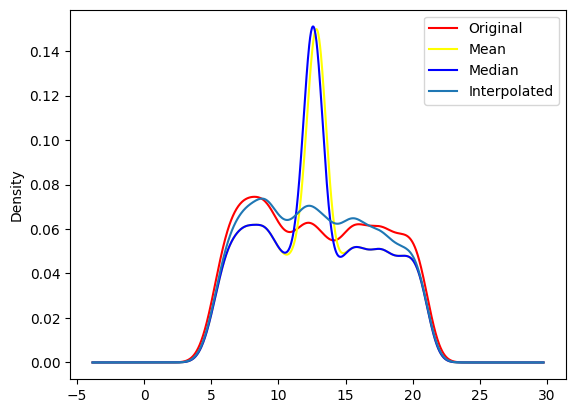

In [469]:
mean_wt=BIGMARTtraindata["Item_Weight"].mean()
median_wt=BIGMARTtraindata["Item_Weight"].median()
BIGMARTtraindata["Item_Weight_mean"]=BIGMARTtraindata["Item_Weight"].fillna(mean_wt)
BIGMARTtraindata["Item_Weight_median"]=BIGMARTtraindata["Item_Weight"].fillna(median_wt)
BIGMARTtraindata["Item_Weight_interpolation_imputation"]=BIGMARTtraindata["Item_Weight"].interpolate("linear")
BIGMARTtraindata["Item_Weight"].plot(kind="kde",color="red",label="Original")
BIGMARTtraindata["Item_Weight_mean"].plot(kind="kde",color="yellow",label="Mean")
BIGMARTtraindata["Item_Weight_median"].plot(kind="kde",color="blue",label="Median")
BIGMARTtraindata["Item_Weight_interpolation_imputation"].plot(kind="kde",label="Interpolated")
plt.legend()
plt.show()

We can notice that the mean,median have way lower variance compared to original

In [470]:
print(BIGMARTtraindata['Item_Weight'].var())
print(BIGMARTtraindata['Item_Weight_mean'].var())
print(BIGMARTtraindata['Item_Weight_median'].var())

21.561688259836558
17.86012173506058
17.869561454073647


<Axes: >

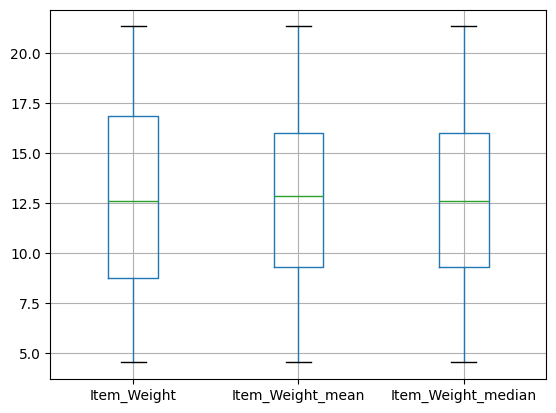

In [471]:
BIGMARTtraindata[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

From the above boxplot, we can conclude that the Item_Weight_mean & Item_Weight_median have lower variance compared to Item_weight.Therefore, we try to compare the variance between Item_weight & Item_Weight_interpolation_imputation.

<Axes: >

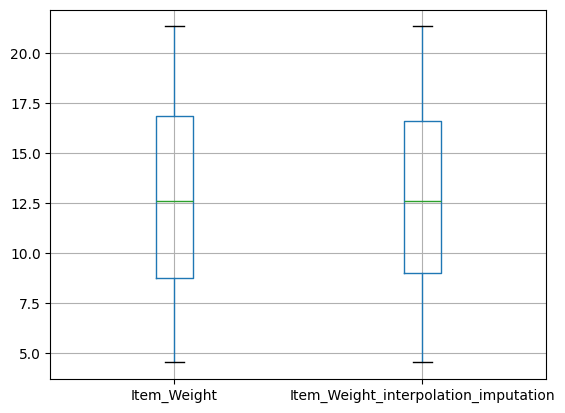

In [472]:
BIGMARTtraindata[['Item_Weight','Item_Weight_interpolation_imputation']].boxplot()

In [473]:
print(BIGMARTtraindata['Item_Weight'].var())
print(BIGMARTtraindata['Item_Weight_interpolation_imputation'].var())

21.561688259836558
19.758685821975472


Therefore,we choose Item_Weight_interpolation_imputation instead of 'Item_Weight_mean' & 'Item_Weight_median'.

In [474]:
data=BIGMARTtraindata.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)


In [475]:
data.isnull().sum()

Item_Identifier                            0
Item_Fat_Content                           0
Item_Visibility                            0
Item_Type                                  0
Item_MRP                                   0
Outlet_Identifier                          0
Outlet_Establishment_Year                  0
Outlet_Size                             2410
Outlet_Location_Type                       0
Outlet_Type                                0
Item_Outlet_Sales                          0
Item_Weight_interpolation_imputation       0
dtype: int64

Outlet Size

In [476]:
data["Outlet_Size"]


0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [477]:
#We can notice that it is a categorical variable and must be replaced with numerical after filling null values using Bivariate Imputation
data['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Bivariate Imputation for filling the missing values

In [478]:
pivot_table = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [479]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [480]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :pivot_table[x])
data.isnull().sum()

Item_Identifier                         0
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                             0
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Outlet_Sales                       0
Item_Weight_interpolation_imputation    0
dtype: int64

<Axes: >

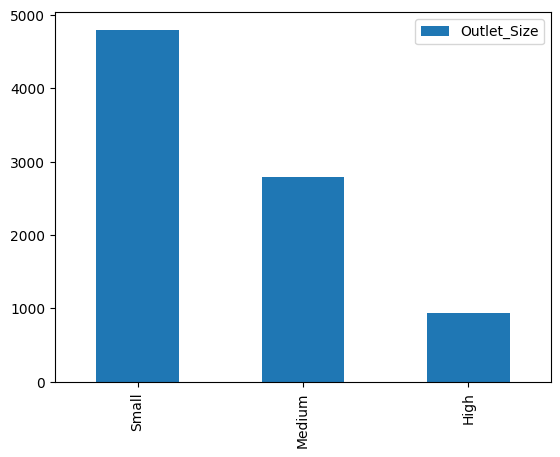

In [481]:
Os=pd.DataFrame(data['Outlet_Size'].value_counts())
Os.plot(kind="bar")

Item_Fat_Content

In [482]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolation_imputation'],
      dtype='object')

In [483]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<Axes: >

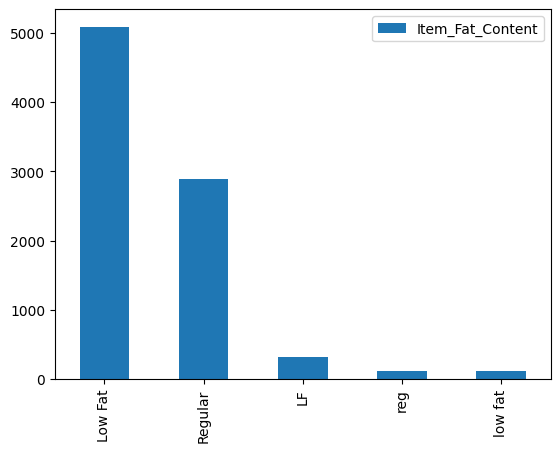

In [484]:
IF.plot(kind='bar')

In [485]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [486]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: >

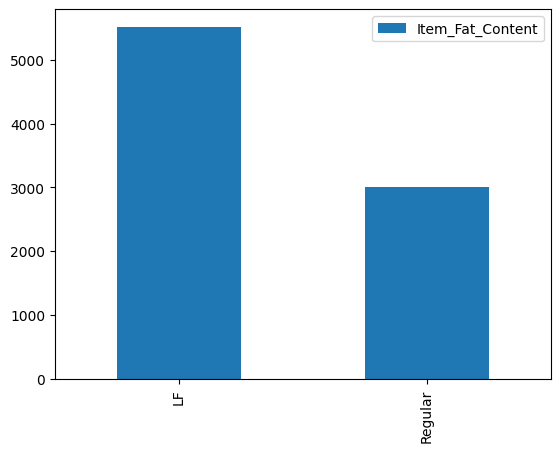

In [487]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
IF.plot(kind='bar')

In [488]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolation_imputation'],
      dtype='object')

Item_Visibility

In [489]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [490]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [491]:
data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

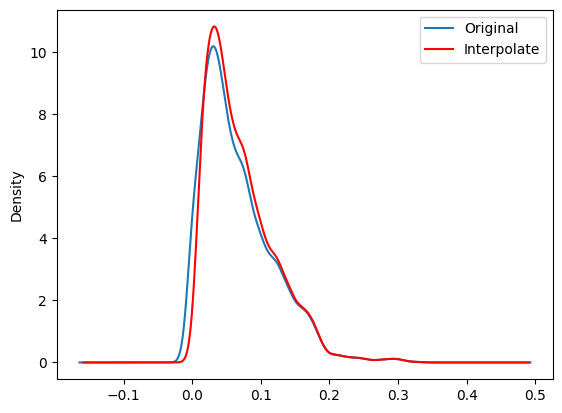

In [492]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [493]:
data = data.drop('Item_Visibility',axis=1)

In [494]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


Item_Type

In [495]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [496]:
IT=pd.DataFrame(data['Item_Type'].value_counts())
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<Axes: >

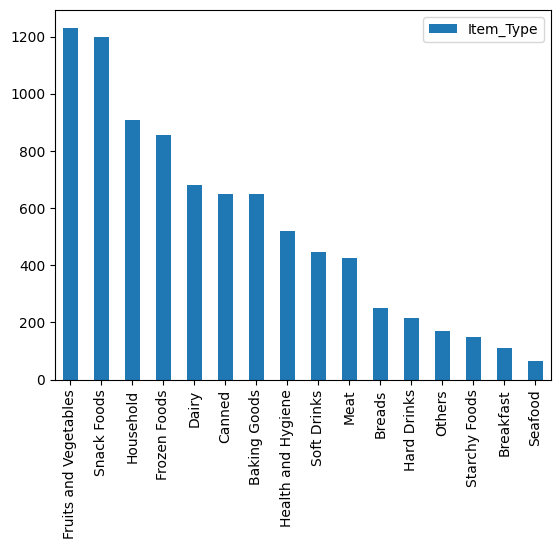

In [497]:
IT.plot(kind='bar')

Item_Identifier

In [498]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [499]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [500]:
data['Item_Identifier_Grouped'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [501]:
data['Item_Identifier_Grouped'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_Grouped, dtype: int64

<Axes: >

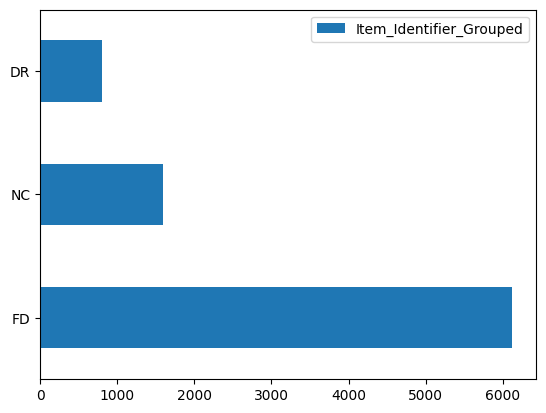

In [502]:
II=pd.DataFrame(data['Item_Identifier_Grouped'].value_counts())
II.plot(kind='barh')

Outlet_Establishment_Year

In [503]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate',
       'Item_Identifier_Grouped'],
      dtype='object')

In [504]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [505]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,FD,25


<Axes: ylabel='Frequency'>

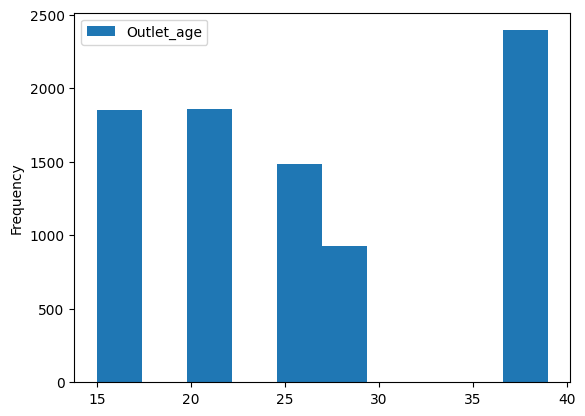

In [506]:
OA=pd.DataFrame(data['Outlet_age'])
OA.plot(kind='hist')

In [507]:
data = data.drop(['Outlet_Establishment_Year','Item_Identifier'],axis=1)

In [508]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,FD,25
1,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,DR,15
2,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,FD,25
3,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,FD,26
4,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,NC,37


Data Encoding and Labelling for handling categorical variables


In [509]:
encoded_data = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    encoded_data[col]=oe.fit_transform(encoded_data[[col]])
    print(oe.categories_)

[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [510]:
encoded_data.head(3)
#therefore all the train data have been preprocessed and encoded

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,1.0,25
1,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,0.0,15
2,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,1.0,25


In [511]:
#For efficient prediction-to fit the model(seperation of input variable->X and target variable->y)
X = encoded_data.drop('Item_Outlet_Sales',axis=1)
y = encoded_data['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [512]:
X

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,1.0,25
1,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,0.0,15
2,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,1.0,25
3,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,1.0,26
4,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,2.0,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,1.0,37
8519,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,1.0,22
8520,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,2.0,20
8521,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,1.0,15


Modelling

Random Forest Regressor

In [513]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print("Random Forest Regressor:",scores.mean())


Random Forest Regressor: 0.5548847755492862


SVR


In [514]:
svm = SVR(kernel='rbf')
svm_scores = cross_val_score(svm, X, y, cv=5, scoring='r2')
print("SVM R-squared Mean:", svm_scores.mean())

SVM R-squared Mean: 0.18783229700366477


DecisionTreeRegressor

In [515]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
print("Decision Tree R-squared Mean:", dt_scores.mean())


Decision Tree R-squared Mean: 0.16300580540635895


KNeighborsRegressor

In [516]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='r2')
print("KNN R-squared Mean:", knn_scores.mean())


KNN R-squared Mean: 0.4468865106816623


LinearRegression

In [517]:
# Linear Regression
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Linear Regression R-squared Mean:", lr_scores.mean())


Linear Regression R-squared Mean: 0.501547093101739


Ridge Regression

In [518]:


# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha (regularization strength)
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge Regression R-squared Mean:", ridge_scores.mean())


Ridge Regression R-squared Mean: 0.5015452893062994


XGBoost

In [519]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print("XgBoost: ",scores.mean())

XgBoost:  0.5955225668410347


In [520]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
6,Outlet_Type,0.376154
3,Outlet_Identifier,0.169257
10,Outlet_age,0.150235
2,Item_MRP,0.147043
4,Outlet_Size,0.118860
5,Outlet_Location_Type,0.029955
8,Item_Visibility_interpolate,0.002641
7,Item_Weight_interpolation_imputation,0.002183
1,Item_Type,0.001741
9,Item_Identifier_Grouped,0.001256


In [521]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X.drop(['Item_Visibility_interpolate','Item_Weight_interpolation_imputation',
'Item_Type','Outlet_Location_Type','Item_Identifier_Grouped','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())


0.5966037632320667


In [522]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolation_imputation',
'Item_Type','Outlet_Location_Type','Item_Identifier_Grouped','Item_Fat_Content'],axis=1)

In [523]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


In [524]:


xg_final = XGBRFRegressor(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=1,
    gamma=0,
    gpu_id=-1,
    importance_type='gain',
    interaction_constraints='',
    max_delta_step=0,
    max_depth=6,
    min_child_weight=1,
    missing=np.nan,
    monotone_constraints='()',
    n_estimators=100,
    n_jobs=4,
    num_parallel_tree=100,
    objective='reg:squarederror',
    random_state=0,
    reg_alpha=0,
    scale_pos_weight=1,
    tree_method='exact',
    validate_parameters=1,
    verbosity=None
)


In [525]:
print(dir(xg_final))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_is_fitted__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_can_use_inplace_predict', '_check_feature_names', '_check_n_features', '_configure_fit', '_create_dmatrix', '_estimator_type', '_get_default_requests', '_get_iteration_range', '_get_metadata_request', '_get_param_names', '_get_tags', '_get_type', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_evaluation_result', '_validate_data', '_validate_params', 'apply', 'base_score', 'best_iteration', 'best_score', 'booster', 'callbacks', 'coef_', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'ea

In [526]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [527]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [528]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [529]:
y_pred = xg_final.predict(X_test)

In [530]:
mean_absolute_error(y_test,y_pred)


714.4168458622603

In [531]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)
new_predictions = xg_final.predict(np.array([[149.0418,3.0,1.0,2.0,15]]))[0]
print(new_predictions)


2059.0977
2349.1763


In [532]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 714.4168458622603


In [533]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1042784.0147779272


In [534]:
# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1021.167965996744


In [535]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.6163371967977687


In [536]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1344.67765625 and 2773.51765625


Import the Test dataset

In [537]:
BIGMARTtestdata=pd.read_csv("E:/Test.csv")
BIGMARTtestdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [538]:
BIGMARTtestdata.shape

(5681, 11)

In [539]:
BIGMARTtestdata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [540]:
BIGMARTtestdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Data Cleaning and Exploration for each attribute

In [541]:
BIGMARTtestdata.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [542]:
BIGMARTtestdata.duplicated().any()

False

Item Weight

Handling the Missing Values using Univariate Imputation

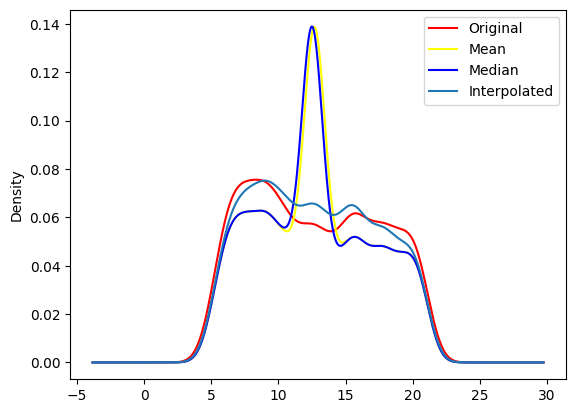

In [543]:
mean_wt=BIGMARTtestdata["Item_Weight"].mean()
median_wt=BIGMARTtestdata["Item_Weight"].median()
BIGMARTtestdata["Item_Weight_mean"]=BIGMARTtestdata["Item_Weight"].fillna(mean_wt)
BIGMARTtestdata["Item_Weight_median"]=BIGMARTtestdata["Item_Weight"].fillna(median_wt)
BIGMARTtestdata["Item_Weight_interpolation_imputation"]=BIGMARTtestdata["Item_Weight"].interpolate("linear")
BIGMARTtestdata["Item_Weight"].plot(kind="kde",color="red",label="Original")
BIGMARTtestdata["Item_Weight_mean"].plot(kind="kde",color="yellow",label="Mean")
BIGMARTtestdata["Item_Weight_median"].plot(kind="kde",color="blue",label="Median")
BIGMARTtestdata["Item_Weight_interpolation_imputation"].plot(kind="kde",label="Interpolated")
plt.legend()
plt.show()

In [544]:
#We can notice that the mean,median have way lower variance compared to original
print(BIGMARTtestdata['Item_Weight'].var())
print(BIGMARTtestdata['Item_Weight_mean'].var())
print(BIGMARTtestdata['Item_Weight_median'].var())

21.760812343231528
18.021630503972027
18.027077062656037


<Axes: >

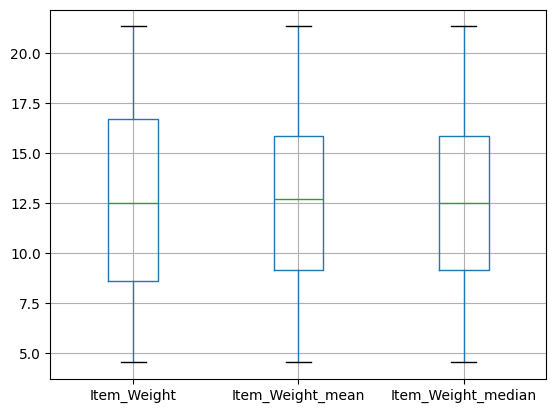

In [545]:
BIGMARTtestdata[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

<Axes: >

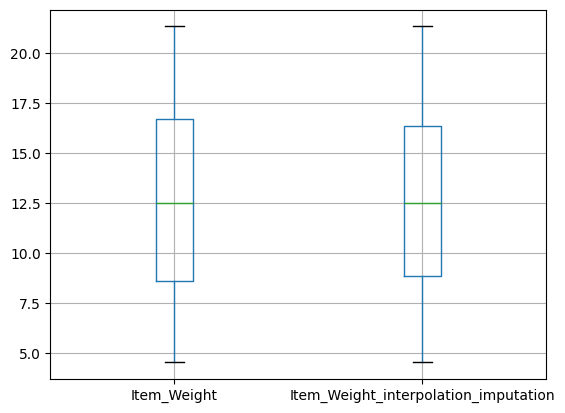

In [546]:
#From the above boxplot, we can conclude that the Item_Weight_mean & Item_Weight_median have lower variance compared to Item_weight.Therefore, we try to compare the variance between Item_weight & Item_Weight_interpolation_imputation.
BIGMARTtestdata[['Item_Weight','Item_Weight_interpolation_imputation']].boxplot()

In [547]:
print(BIGMARTtestdata['Item_Weight'].var())
print(BIGMARTtestdata['Item_Weight_interpolation_imputation'].var())

21.760812343231528
19.990913374786317


Therefore,we choose Item_Weight_interpolation_imputation instead of 'Item_Weight_mean' & 'Item_Weight_median'.

In [548]:
data=BIGMARTtestdata.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)


In [549]:
data.isnull().sum()

Item_Identifier                            0
Item_Fat_Content                           0
Item_Visibility                            0
Item_Type                                  0
Item_MRP                                   0
Outlet_Identifier                          0
Outlet_Establishment_Year                  0
Outlet_Size                             1606
Outlet_Location_Type                       0
Outlet_Type                                0
Item_Weight_interpolation_imputation       0
dtype: int64

Outlet Size

In [550]:
data["Outlet_Size"]


0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [551]:
#We can notice that it is a categorical variable and must be replaced with numerical after filling null values using Bivariate Imputation
data['Outlet_Size'].value_counts()


Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Bivariate Imputation for filling the missing values

In [552]:
pivot_table = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [553]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [554]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :pivot_table[x])
data.isnull().sum()

Item_Identifier                         0
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                             0
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Weight_interpolation_imputation    0
dtype: int64

<Axes: >

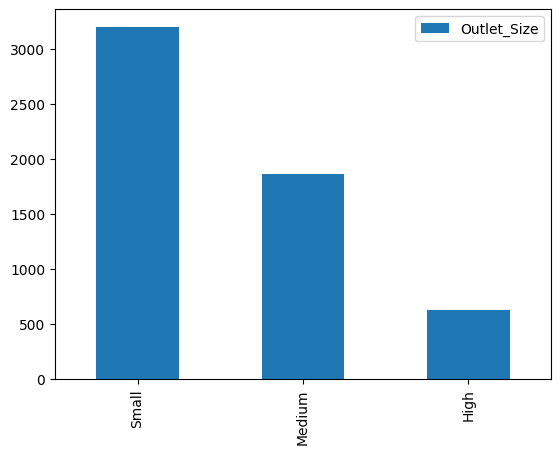

In [555]:
Os=pd.DataFrame(data['Outlet_Size'].value_counts())
Os.plot(kind="bar")

Item_Fat_Content

In [556]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

In [557]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

<Axes: >

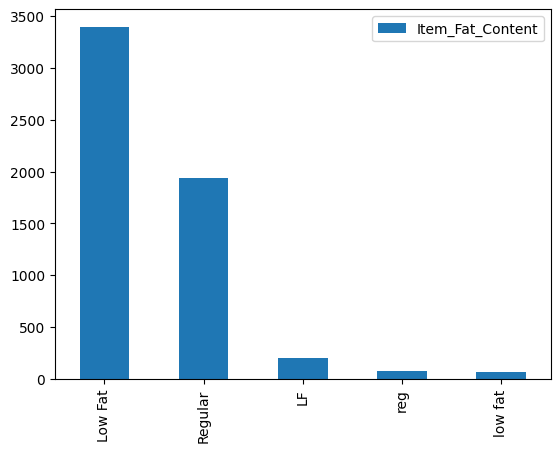

In [558]:
IF.plot(kind='bar')

In [559]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [560]:
data['Item_Fat_Content'].value_counts()

LF         3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<Axes: >

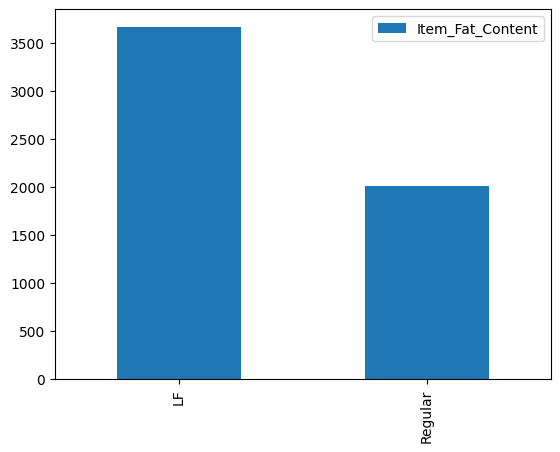

In [561]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
IF.plot(kind='bar')

In [562]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

Item_Visibility

In [563]:
data['Item_Visibility'].value_counts()

0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [564]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [565]:
data['Item_Visibility_interpolate'].value_counts()

0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: Item_Visibility_interpolate, Length: 5629, dtype: int64

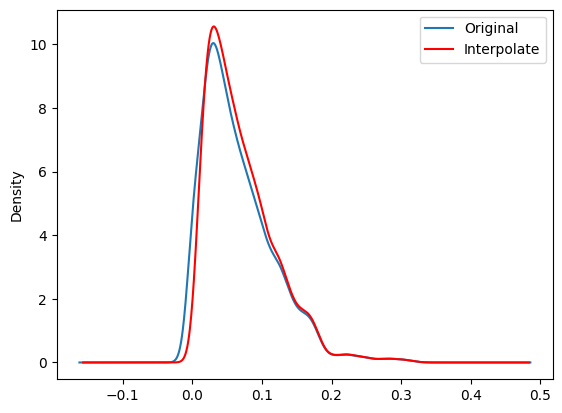

In [566]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [567]:
data = data.drop('Item_Visibility',axis=1)

In [568]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate
0,FDW58,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565


Item_Type

In [569]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [570]:
IT=pd.DataFrame(data['Item_Type'].value_counts())
data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

<Axes: >

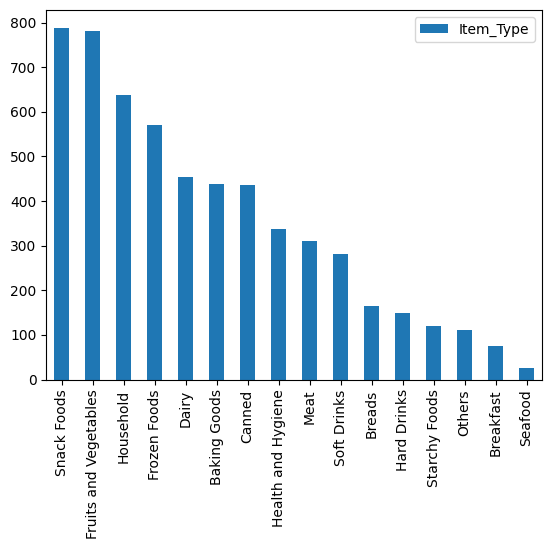

In [571]:
IT.plot(kind='bar')

Item_Identifier

In [572]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [573]:
data['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [574]:
data['Item_Identifier_Grouped'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [575]:
data['Item_Identifier_Grouped'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier_Grouped, dtype: int64

<Axes: >

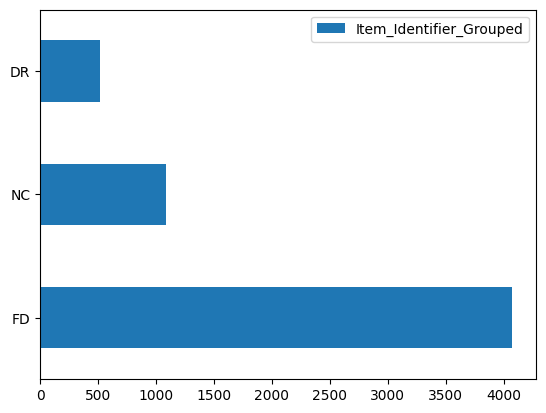

In [576]:
II=pd.DataFrame(data['Item_Identifier_Grouped'].value_counts())
II.plot(kind='barh')

In [577]:
data = data.drop(['Item_Identifier'],axis=1)

Outlet_Establishment_Year

In [578]:
data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight_interpolation_imputation',
       'Item_Visibility_interpolate', 'Item_Identifier_Grouped'],
      dtype='object')

In [579]:
data['Outlet_Establishment_Year']

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64

In [580]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565,FD,25


<Axes: ylabel='Frequency'>

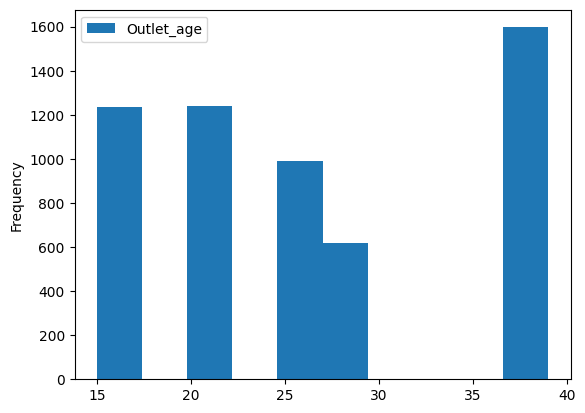

In [581]:
OA=pd.DataFrame(data['Outlet_age'])
OA.plot(kind='hist')

In [582]:
data = data.drop(['Outlet_Establishment_Year'],axis=1)

In [583]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,FD,25
1,Regular,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,8.3000,0.038428,FD,17
2,LF,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,14.6000,0.099575,NC,26
3,LF,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,7.3150,0.015388,FD,17
4,Regular,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,FD,39


Data Encoding and Labelling for handling categorical variables


In [584]:


encoded_data = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    encoded_data[col]=oe.fit_transform(encoded_data[[col]])
    print(oe.categories_)

[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [585]:
test_final=encoded_data.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolation_imputation',
'Item_Type','Outlet_Location_Type','Item_Identifier_Grouped','Item_Fat_Content'],axis=1)
test_final.head()

#therefore all the test data have been preprocessed and encoded

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,107.8622,9.0,1.0,1.0,25
1,87.3198,2.0,2.0,1.0,17
2,241.7538,0.0,2.0,0.0,26
3,155.0340,2.0,2.0,1.0,17
4,234.2300,5.0,1.0,3.0,39


In [586]:
test_final=test_final.values.tolist()
test_final

[[107.8622, 9.0, 1.0, 1.0, 25.0],
 [87.3198, 2.0, 2.0, 1.0, 17.0],
 [241.7538, 0.0, 2.0, 0.0, 26.0],
 [155.034, 2.0, 2.0, 1.0, 17.0],
 [234.23, 5.0, 1.0, 3.0, 39.0],
 [117.1492, 8.0, 2.0, 1.0, 27.0],
 [50.1034, 3.0, 1.0, 2.0, 15.0],
 [81.0592, 5.0, 1.0, 3.0, 39.0],
 [95.7436, 7.0, 2.0, 1.0, 22.0],
 [186.8924, 2.0, 2.0, 1.0, 17.0],
 [118.3466, 2.0, 2.0, 1.0, 17.0],
 [85.3908, 7.0, 2.0, 1.0, 22.0],
 [240.4196, 4.0, 2.0, 0.0, 39.0],
 [122.3098, 9.0, 1.0, 1.0, 25.0],
 [52.0298, 1.0, 0.0, 1.0, 37.0],
 [151.6366, 9.0, 1.0, 1.0, 25.0],
 [198.7768, 7.0, 2.0, 1.0, 22.0],
 [192.2188, 3.0, 1.0, 2.0, 15.0],
 [109.6912, 5.0, 1.0, 3.0, 39.0],
 [193.7136, 0.0, 2.0, 0.0, 26.0],
 [175.008, 1.0, 0.0, 1.0, 37.0],
 [239.9196, 6.0, 2.0, 1.0, 20.0],
 [47.7402, 8.0, 2.0, 1.0, 27.0],
 [142.347, 4.0, 2.0, 0.0, 39.0],
 [180.7318, 6.0, 2.0, 1.0, 20.0],
 [209.4928, 0.0, 2.0, 0.0, 26.0],
 [47.6034, 6.0, 2.0, 1.0, 20.0],
 [161.3894, 8.0, 2.0, 1.0, 27.0],
 [244.6802, 8.0, 2.0, 1.0, 27.0],
 [116.5492, 6.0, 2.0, 1.0, 

In [587]:
samp=xg_final.predict(test_final).tolist()
f=pd.DataFrame(xg_final.predict(test_final))
f


,0
0,1616.179077
1,1448.785034
2,588.002075
3,2536.292969
4,6212.969238
...,...
5676,2059.097656
5677,2542.495605
5678,2013.083862
5679,3655.640381


In [588]:
f.loc[0].values

array([1616.1791], dtype=float32)

In [589]:
print(f"Sales Value for 1st test data is between {(f.loc[0].values)-714.42} and {(f.loc[0].values)+714.42}")

Sales Value for 1st test data is between [901.7591] and [2330.599]


In [590]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

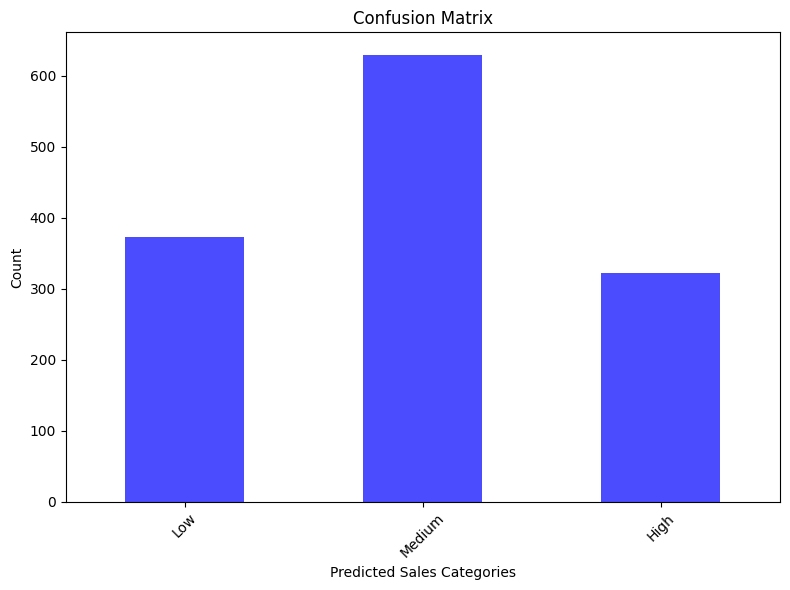

Confusion Matrix:
Low       373
Medium    630
High      322
dtype: int64


In [598]:
from sklearn.metrics import confusion_matrix

# Preprocess the test data similar to how you preprocessed the train data
# (Fill missing values, encode categorical variables, drop unnecessary columns, etc.)

# Assume you have the predictions 'y_pred' from your model
# Bin the predicted values into categories: Low, Medium, High
bins = [67.919762, 1043.674561, 3081.811523, 6298.360840]
labels = ['Low', 'Medium','High']

# Binning the predicted values
predicted_categories = pd.cut(samp, bins=bins, labels=labels)

# Count the occurrences for each predicted label
conf_matrix = pd.Series(predicted_categories).value_counts().reindex(labels, fill_value=0)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sales Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Save Model Using Joblib

In [599]:
joblib.dump(xg_final,'bigmart_model')


['bigmart_model']

In [600]:
model = joblib.load('bigmart_model')